# Choose a Data Set

You can choose to analyze any data that you would like! Remember, you need 1000 rows of non-null data in order to get 5 points for the "Data" criteria of my [rubric](https://docs.google.com/document/d/1s3wllcF3LLnytxwD8mZ-BCypXKnfaahnizWGNojT-B4/edit?usp=sharing). Consider looking at [Kaggle](https://www.kaggle.com/datasets) or [free APIs](https://free-apis.github.io/#/browse) for datasets of this size. Alternatively, you can scrape the web to make your own dataset! :D

Once you have chosen your dataset, please read your data into a dataframe and call `.info()` below. If you don't call `info` I will give you 0 points for the first criteria described on the [rubric](https://docs.google.com/document/d/1s3wllcF3LLnytxwD8mZ-BCypXKnfaahnizWGNojT-B4/edit?usp=sharing).

# My Question

### How do the frequency and timing of public and school holiday celebrations vary across countries?

# My Analysis

Fetching holidays for AD...
Fetching holidays for AL...
Fetching holidays for AT...
Fetching holidays for BE...
Fetching holidays for BG...
Fetching holidays for BY...
Fetching holidays for CH...
Fetching holidays for CZ...
Fetching holidays for DE...
Fetching holidays for EE...
Fetching holidays for ES...
Fetching holidays for FR...
Fetching holidays for HR...
Fetching holidays for HU...
Fetching holidays for IE...
Fetching holidays for IT...
Fetching holidays for LI...
Fetching holidays for LT...
Fetching holidays for LU...
Fetching holidays for LV...
Fetching holidays for MC...
Fetching holidays for MD...
Fetching holidays for MT...
Fetching holidays for NL...
Fetching holidays for PL...
Fetching holidays for PT...
Fetching holidays for RO...
Fetching holidays for RS...
Fetching holidays for SI...
Fetching holidays for SK...
Fetching holidays for SM...
Fetching holidays for VA...
Total data points: 3907
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3907 entries, 0 to 3906
Data c

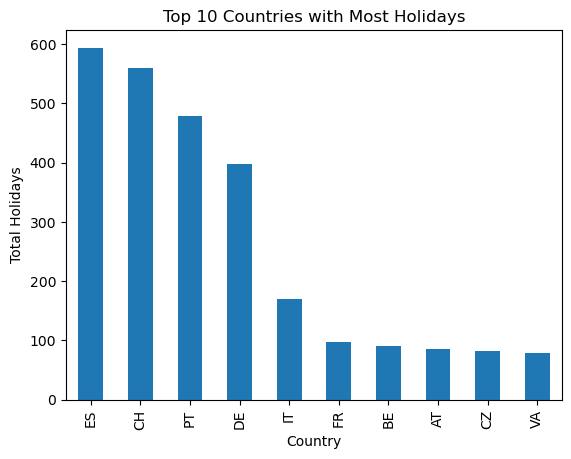

5-Number Summary of Holidays:
count     32.000000
mean     122.093750
std      152.243514
min       40.000000
25%       56.750000
50%       64.000000
75%       82.750000
max      594.000000
dtype: float64


In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

# Fetch holidays function
def fetch_holidays(endpoint, country_code, valid_from, valid_to):
    url = f"https://openholidaysapi.org/{endpoint}?countryIsoCode={country_code}&validFrom={valid_from}&validTo={valid_to}"
    response = requests.get(url)
    if response.status_code == 200:
        try:
            return response.json()
        except Exception as e:
            print(f"Error parsing JSON for {endpoint} in {country_code}: {e}")
            return []
    else:
        print(f"Failed to fetch {endpoint} for {country_code}: {response.status_code}")
        return []

# Parameters
valid_from = "2022-01-01"
valid_to = "2024-12-31"

# Fetch list of supported countries
response = requests.get("https://openholidaysapi.org/Countries")
if response.status_code == 200:
    countries = [country["isoCode"] for country in response.json()]
else:
    print("Failed to fetch countries list")
    countries = []

# Initialize data storage
all_holidays = []

# Fetch data for each country
for country_code in countries:
    print(f"Fetching holidays for {country_code}...")
    public_holidays = fetch_holidays("PublicHolidays", country_code, valid_from, valid_to)
    school_holidays = fetch_holidays("SchoolHolidays", country_code, valid_from, valid_to)

    # Process public holidays
    for holiday in public_holidays:
        all_holidays.append({
            "country": country_code,
            "date": holiday.get("startDate"),
            "name": holiday.get("name")[0]["text"] if holiday.get("name") else "Unknown",
            "type": "Public",
            "subdivision": holiday.get("subdivisions", [{}])[0].get("shortName", "National"),
        })

    # Process school holidays
    for holiday in school_holidays:
        all_holidays.append({
            "country": country_code,
            "date": holiday.get("startDate"),
            "name": holiday.get("name")[0]["text"] if holiday.get("name") else "Unknown",
            "type": "School",
            "subdivision": holiday.get("subdivisions", [{}])[0].get("shortName", "National"),
        })

# Create DataFrame
df = pd.DataFrame(all_holidays)

# Clean and format data
df["date"] = pd.to_datetime(df["date"], errors="coerce")
df = df.dropna(subset=["date"])  # Remove rows with invalid dates

# Save dataset
df.to_csv("holidays.csv", index=False)

# Summary
print(f"Total data points: {len(df)}")
print(df.info())

# Frequency Table
holiday_counts = df.groupby("country").size()
print(holiday_counts)

# Bar Chart
top_10_countries = holiday_counts.nlargest(10)
top_10_countries.plot(kind="bar", title="Top 10 Countries with Most Holidays", ylabel="Total Holidays", xlabel="Country")
plt.show()

# 5-Number Summary
summary = holiday_counts.describe()
print("5-Number Summary of Holidays:")
print(summary)


# My Answer

### Spain has the most holidays of all the countries, with 594 total celebrations across the regions. Switzerland comes next with 560 holidays, and Portugal follows with 479. Germany is fourth with 397 holidays, while Italy, France, Belgium, Austria, Czechia, and Vatican City make up the rest of the top ten. This data shows that some countries celebrate significantly more holidays than others, depending on their traditions and culture. 
On average, countries have about 122 holid celebrationays, but this number isn’t the whole story. Some countries, like Spain, have a lot more, while others, like Belarus, only have around 40. The middle value, or median, is 64, meaning more than half the countries have fewer than the average. Thidifference s happens because a few countries witmany f holidays make the averagnumber of holiday celebrations e seem higher than it really is for most place 

Looking at this dhighlights how somerregionsrhave more recognized celebrations and ate holidthan otherswwer. Tvariability his could be because of differences in culture, religion, or how countries organize their school and public holidays. Overall i iinteresting to discover see different locations seem to valuemuch holicelebrations in different ways, evidenced by the variance in the spread of the number of holiday celebrationsvary around the world!